In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [272]:
data = pd.read_csv('1.04. Real-life example.csv')
data

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277     2.00      Petrol   
1     Mercedes-Benz    7900.0        van      427     2.90      Diesel   
2     Mercedes-Benz   13300.0      sedan      358     5.00         Gas   
3              Audi   23000.0  crossover      240     4.20      Petrol   
4            Toyota   18300.0  crossover      120     2.00      Petrol   
5     Mercedes-Benz  199999.0  crossover        0     5.50      Petrol   
6               BMW    6100.0      sedan      438     2.00         Gas   
7              Audi   14200.0      vagon      200     2.70      Diesel   
8           Renault   10799.0      vagon      193     1.50      Diesel   
9        Volkswagen    1400.0      other      212     1.80         Gas   
10          Renault   11950.0      vagon      177     1.50      Diesel   
11          Renault    2500.0      sedan      260     1.79      Petrol   
12             Audi    9500.0      vagon      165     2.70         Gas   
13       Volkswagen   10500.0      sedan      100     1.80      Petrol   
14           Toyota   16000.0  crossover      250     4.70         Gas   
15          Renault    8600.0      hatch       84     1.50      Diesel   
16              BMW    2990.0      other      203     2.00      Petrol   
17    Mercedes-Benz       NaN        van      240     2.20      Diesel   
18           Toyota   26500.0  crossover       21     2.00      Petrol   
19             Audi    3500.0      vagon      250     2.50      Diesel   
20           Toyota   38233.0      other        0     2.40      Diesel   
21       Volkswagen    7500.0      hatch      132     1.40      Diesel   
22             Audi    6800.0      sedan      225     2.40         Gas   
23       Mitsubishi   10500.0  crossover      130     2.40         Gas   
24             Audi   24900.0      sedan      163     4.20      Diesel   
25       Volkswagen   20800.0  crossover      151     3.00      Diesel   
26             Audi    6500.0      sedan      330     2.40      Petrol   
27    Mercedes-Benz   13566.0      other      171     2.20       Other   
28       Mitsubishi    8500.0      hatch       65     1.30      Petrol   
29    Mercedes-Benz       NaN  crossover        0     4.60      Petrol   
...             ...       ...        ...      ...      ...         ...   
4315     Volkswagen   15500.0      sedan       80     1.40      Petrol   
4316     Volkswagen    9750.0        van      159     1.90      Diesel   
4317            BMW   16100.0  crossover      194     3.00      Diesel   
4318  Mercedes-Benz  300000.0      other       37     5.00      Petrol   
4319  Mercedes-Benz    5500.0      sedan      440     2.00      Petrol   
4320     Volkswagen    9200.0      vagon      171     1.60      Petrol   
4321     Volkswagen    5150.0        van      240     2.00      Diesel   
4322         Toyota  100000.0  crossover        0     4.50      Diesel   
4323        Renault    8999.0      other      126     2.00      Diesel   
4324  Mercedes-Benz   16800.0      sedan      125     1.80      Petrol   
4325  Mercedes-Benz    8200.0      sedan      280     2.40         Gas   
4326  Mercedes-Benz   24950.0      other       60     1.80      Petrol   
4327           Audi   80999.0  crossover        0     3.00      Diesel   
4328  Mercedes-Benz    7300.0        van      207     2.20      Diesel   
4329     Volkswagen    2200.0      hatch      400     1.30       Other   
4330            BMW   21335.0      other      105     3.00      Petrol   
4331            BMW   45000.0  crossover       80     3.00      Petrol   
4332        Renault    6750.0        van      155     1.50      Diesel   
4333        Renault    7000.0        van      210     1.50      Diesel   
4334            BMW   12090.0      hatch      145     1.60      Petrol   
4335            BMW   27900.0      sedan       38     2.00      Petrol   
4336        Renault    2100.0      vagon      237     1.90      Diesel   
4337        Renaul

In [273]:
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [274]:
raw_data = data.copy()

In [275]:
raw_data = raw_data.drop(['Model'],axis=1)

In [276]:
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

# Dealing with Missing Values

In [277]:
raw_data.isnull().sum()
#If you are removing < 5% of the observations, 
#you are free to just remove all that have MV

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [278]:
data_no_mv=raw_data.dropna(axis=0)

In [279]:
data_no_mv.describe()

Price      Mileage      EngineV         Year
count    4025.000000  4025.000000  4025.000000  4025.000000
mean    19552.308065   163.572174     2.764586  2006.379627
std     25815.734988   103.394703     4.935941     6.695595
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    90.000000     1.800000  2003.000000
50%     11500.000000   158.000000     2.200000  2007.000000
75%     21900.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000

# Exploring the PDFs

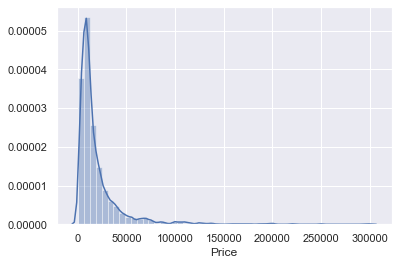

In [280]:
sns.distplot(data_no_mv['Price'])

# Dealing with Outliers

In [281]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

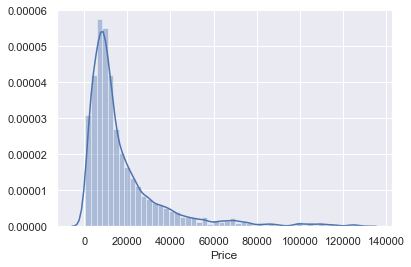

In [282]:
sns.distplot(data_1['Price'])

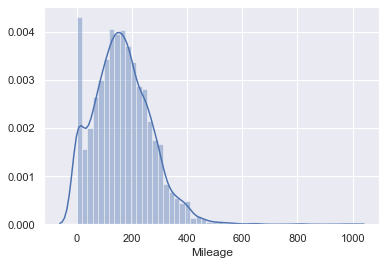

In [283]:
sns.distplot(data_1['Mileage'])

In [284]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe()

Price      Mileage      EngineV         Year
count    3944.000000  3944.000000  3944.000000  3944.000000
mean    17933.880822   161.484026     2.747612  2006.389959
std     19008.212025    96.027108     4.980406     6.595986
min       600.000000     0.000000     0.600000  1969.000000
25%      7000.000000    92.000000     1.800000  2003.000000
50%     11500.000000   158.000000     2.200000  2007.000000
75%     21376.250000   230.000000     3.000000  2011.000000
max    129222.000000   435.000000    99.990000  2016.000000

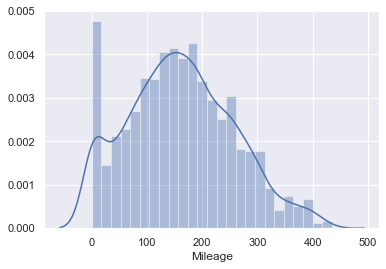

In [285]:
sns.distplot(data_2['Mileage'])

In [286]:
#Engine Values ranges from 0.6 to 6.4. and 
#a common way to replace missing values to 99.99
data_3 = data_2[data_2['EngineV'] < 6.5]

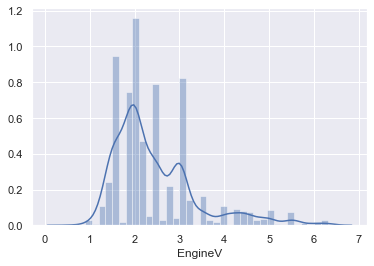

In [287]:
sns.distplot(data_3['EngineV'])

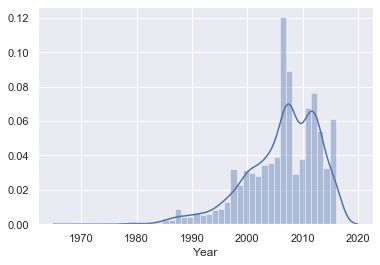

In [288]:
sns.distplot(data_3['Year'])

In [289]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

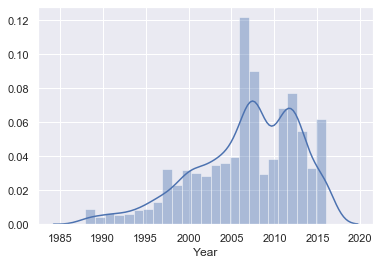

In [290]:
sns.distplot(data_4['Year'])

In [291]:
data_cleaned = data_4.reset_index(drop=True)

In [292]:
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

# Checking the OLS Assumptions

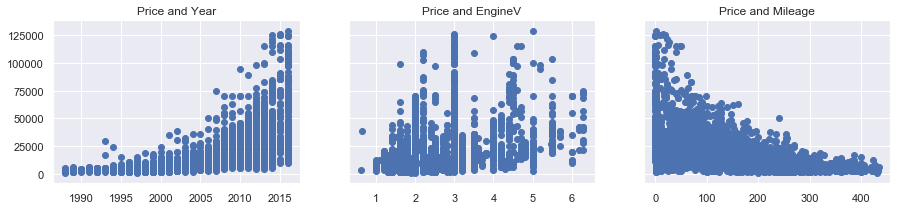

In [293]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [294]:
log_price = np.log(data_cleaned['Price'])

In [295]:
data_cleaned['log_price'] = log_price

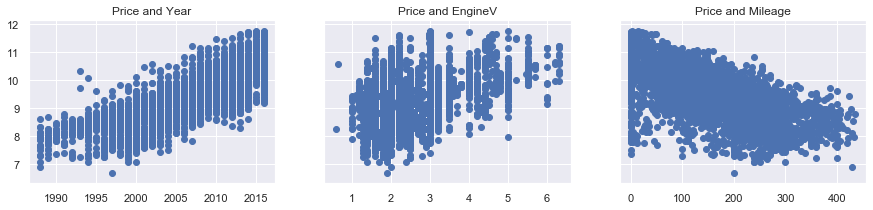

In [296]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

In [297]:
#No Endogeneity - will discuss when the regression is created
#Normality is assumed to be a big sample, zero mean has already implmented
#Homoscedasticity assumption already hold as it's show linear line pattern 
#and we already log transformed
#No Autocorrelation :- The obesrvation that we have are not coming from 
#time series data or panel data

In [298]:
#Multicollinearity
#sklearn does not have this functionality so we will use statsmodel
#One of the best ways to check for multicollinearity is through VIF (Variance inflation factor)

In [299]:
data_cleaned =data_cleaned.drop(['Price'], axis=1)

In [300]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [301]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns


In [302]:
vif
#VIF = 1, no multicollinearity
# 1 to 5, perfectly okay
# 6 < 10 < VIF: unacceptable

VIF features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

In [303]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

In [304]:
data_no_multicollinearity.head()

Brand       Body  Mileage  EngineV Engine Type Registration  \
0            BMW      sedan      277      2.0      Petrol          yes   
1  Mercedes-Benz        van      427      2.9      Diesel          yes   
2  Mercedes-Benz      sedan      358      5.0         Gas          yes   
3           Audi  crossover      240      4.2      Petrol          yes   
4         Toyota  crossover      120      2.0      Petrol          yes   

   log_price  
0   8.342840  
1   8.974618  
2   9.495519  
3  10.043249  
4   9.814656

In [305]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_no_multicollinearity[['Mileage', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [306]:
vif

VIF features
0  2.805214  Mileage
1  2.805214  EngineV

# Create dummy variables

In [307]:
data_with_dummies= pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [308]:
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

In [309]:
#Rearrange a bit

In [310]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [311]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [312]:
cols

['Mileage',
 'EngineV',
 'log_price',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [313]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

# Linear Regression Model

In [314]:
#Declare the inputs and outputs

In [315]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

Scale the Data

In [316]:
from sklearn.preprocessing import StandardScaler

In [317]:
scaler = StandardScaler()

In [318]:
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [319]:
inputs_scaled = scaler.transform(inputs)

In [320]:
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

Train Test Split

In [321]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled, targets, test_size=0.2,random_state=365)

Create the Regression

In [322]:
reg = LinearRegression()

In [323]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
y_hat= reg.predict(x_train)

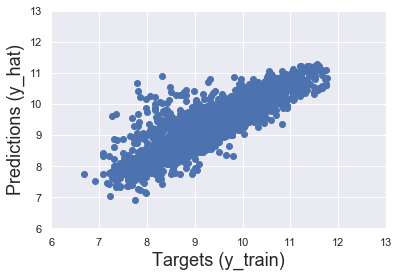

In [325]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Find the weights and bias

Text(0.5, 1.0, 'Residuals PDF')

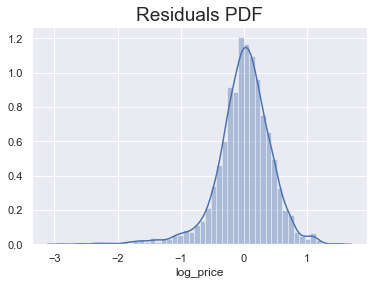

In [326]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size = 19)

In [327]:
reg.score(x_train,y_train)

0.744996578792662

# Find the weights and bias

In [328]:
reg.intercept_

9.415239458021299

In [329]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [330]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_


In [331]:
reg_summary

Features   Weights
0               Mileage -0.448713
1               EngineV  0.209035
2             Brand_BMW  0.014250
3   Brand_Mercedes-Benz  0.012882
4      Brand_Mitsubishi -0.140552
5         Brand_Renault -0.179909
6          Brand_Toyota -0.060550
7      Brand_Volkswagen -0.089924
8            Body_hatch -0.145469
9            Body_other -0.101444
10           Body_sedan -0.200630
11           Body_vagon -0.129887
12             Body_van -0.168597
13      Engine Type_Gas -0.121490
14    Engine Type_Other -0.033368
15   Engine Type_Petrol -0.146909
16     Registration_yes  0.320473

Testing

In [332]:
y_hat_test = reg.predict(x_test)

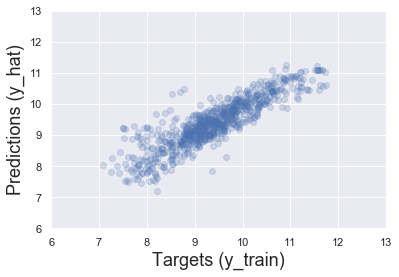

In [333]:
plt.scatter(y_test, y_hat_test,alpha=.2)  
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [356]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

Predictions
0  10685.501696
1   3499.255242
2   7553.285218
3   7463.963017
4  11353.490075

In [363]:
y_test = y_test.reset_index(drop=True)


In [364]:
df_pf['Targets']= np.exp(y_test)

In [365]:
df_pf.head()

Predictions  Targets    Residuals  Difference%
0  10685.501696   2300.0 -8385.501696  -364.587030
1   3499.255242   2800.0  -699.255242   -24.973402
2   7553.285218   2500.0 -5053.285218  -202.131409
3   7463.963017   6400.0 -1063.963017   -16.624422
4  11353.490075   9150.0 -2203.490075   -24.081859

In [366]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']

In [368]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Targets'] * 100)

In [369]:
df_pf.describe()

Predictions        Targets     Residuals  Difference%
count    774.000000     774.000000    774.000000   774.000000
mean   15946.760167   18165.817106   2219.056939    36.256693
std    13133.197604   19967.858908  10871.218143    55.066507
min     1320.562768    1200.000000 -29456.498331     0.062794
25%     7413.644234    6900.000000  -2044.191251    12.108022
50%    11568.168859   11600.000000    142.518577    23.467728
75%    20162.408805   20500.000000   3147.343497    39.563570
max    77403.055224  126000.000000  85106.162329   512.688080

In [371]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_pf.sort_values(by=['Difference%'])

Predictions   Targets  Residuals  Difference%
698     30480.85  30500.00      19.15         0.06
742     16960.31  16999.00      38.69         0.23
60      12469.21  12500.00      30.79         0.25
110     25614.14  25500.00    -114.14         0.45
367     42703.68  42500.00    -203.68         0.48
369      3084.69   3100.00      15.31         0.49
769     29651.73  29500.00    -151.73         0.51
272      9749.53   9800.00      50.47         0.52
714     23118.07  22999.00    -119.07         0.52
630      8734.58   8800.00      65.42         0.74
380      3473.79   3500.00      26.21         0.75
648     21174.10  21335.00     160.90         0.75
308      8967.74   8900.00     -67.74         0.76
665     17858.02  18000.00     141.98         0.79
379     17654.84  17800.00     145.16         0.82
719     11391.95  11500.00     108.05         0.94
102     28625.56  28900.00     274.44         0.95
94       7724.17   7800.00      75.83         0.97
561      6429.03   6500.00      70.97         1.09
242      7597.39   7500.00     -97.39         1.30
528     18555.09  18800.00     244.91         1.30
61       7396.87   7300.00     -96.87         1.33
19      16178.14  16400.00     221.86         1.35
280     12327.10  12499.00     171.90         1.38
311     51287.19  52055.25     768.06         1.48
723      6009.63   6100.00      90.37         1.48
49       4973.17   4900.00     -73.17         1.49
114     27716.14  27300.00    -416.14         1.52
636     28498.91  28950.00     451.09         1.56
612      2953.17   3000.00      46.83         1.56
47      26425.14  25999.00    -426.14         1.64
23      13111.91  12900.00    -211.91         1.64
31      12858.08  12650.00    -208.08         1.64
91      13421.16  13200.00    -221.16         1.68
329      7327.18   7200.00    -127.18         1.77
549      3816.33   3750.00     -66.33         1.77
252      9721.50   9900.00     178.50         1.80
387     44173.72  44999.00     825.28         1.83
267     40753.58  40000.00    -753.58         1.88
467     22262.80  22711.65     448.85         1.98
556     18231.44  18600.00     368.56         1.98
165      9596.94   9400.00    -196.94         2.10
259      6067.79   6200.00     132.21         2.13
601     35371.16  34600.00    -771.16         2.23
708     11967.39  11700.00    -267.39         2.29
593     17908.00  17500.00    -408.00         2.33
398      8707.13   8500.00    -207.13         2.44
526     29049.27  28350.00    -699.27         2.47
603     14513.46  14900.00     386.54         2.59
53      20453.89  21000.00     546.11         2.60
632     15383.35  14990.00    -393.35         2.62
533     24642.50  24000.00    -642.50         2.68
497     50099.92  51500.00    1400.08         2.72
212     16133.86  15700.00    -433.86         2.76
130     17489.92  18000.00     510.08         2.83
290      1894.40   1950.00      55.60         2.85
78      30810.25  29900.00    -910.25         3.04
642      8721.97   8999.00     277.03         3.08
437     18866.50  18300.00    -566.50         3.10
101      5958.63   6150.00     191.37         3.11
314      5811.74   6000.00     188.26         3.14
150      9800.43   9500.00    -300.43         3.16
565      7324.63   7100.00    -224.63         3.16
574     12583.52  13000.00     416.48         3.20
591     10115.13   9800.00    -315.13         3.22
172     11156.38  10800.00    -356.38         3.30
133      9279.28   9600.00     320.72         3.34
480     31369.37  32500.00    1130.63         3.48
87       2315.71   2400.00      84.29         3.51
11       5175.77   5000.00    -175.77         3.52
43      21611.83  22400.00     788.17         3.52
96       7976.26   7700.00    -276.26         3.59
406     24874.86  23999.00    -875.86         3.65
173     36516.35  37900.00    1383.65         3.65
540      4666.05   4500.00    -166.05         3.69
40      18672.68  18000.00    -672.68         3.74
340     14815.83  15400.00     584.17         3.79
239     10581.62  10999.00 

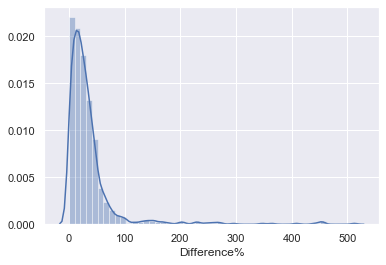

In [372]:
sns.distplot(df_pf['Difference%'])

(array([661.,  76.,  12.,   7.,   6.,   4.,   1.,   2.,   4.,   1.]),
 array([6.27939746e-02, 5.13253226e+01, 1.02587851e+02, 1.53850380e+02,
        2.05112908e+02, 2.56375437e+02, 3.07637965e+02, 3.58900494e+02,
        4.10163023e+02, 4.61425551e+02, 5.12688080e+02]),
 <a list of 10 Patch objects>)

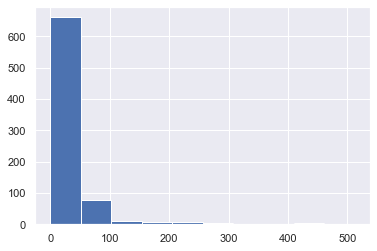

In [376]:
plt.hist(df_pf['Difference%'],10)

In [377]:
df_pf.shape

(774, 4)

In [400]:
q = df_pf['Difference%'].quantile(0.99)
q

309.54906214867106

In [401]:
df_pf_out.shape

(766, 4)

In [ ]:
df_pf_out = df_pf.copy()

In [390]:
df_pf_out = df_pf[df_pf['Difference%']<q]
df_pf_out.head()

Predictions  Targets  Residuals  Difference%
1      3499.26  2800.00    -699.26        24.97
2      7553.29  2500.00   -5053.29       202.13
3      7463.96  6400.00   -1063.96        16.62
4     11353.49  9150.00   -2203.49        24.08
5     21289.80 20000.00   -1289.80         6.45

(array([467., 214.,  46.,  12.,   7.,   7.,   4.,   3.,   3.,   3.]),
 array([6.27939746e-02, 2.96228336e+01, 5.91828732e+01, 8.87429128e+01,
        1.18302952e+02, 1.47862992e+02, 1.77423032e+02, 2.06983071e+02,
        2.36543111e+02, 2.66103151e+02, 2.95663190e+02]),
 <a list of 10 Patch objects>)

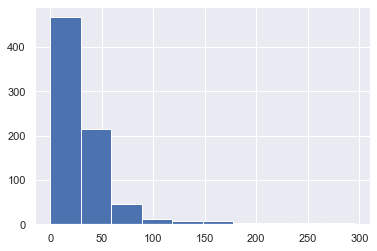

In [389]:
plt.hist(df_pf_out['Difference%'],10)

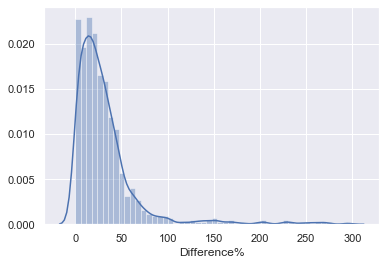

In [391]:
sns.distplot(df_pf_out['Difference%'])

TypeError: 'tuple' object is not callable